In [1]:
from coffea import util, hist
import matplotlib.pyplot as plt
import mplhep
import math
import numpy as np
plt.style.use(mplhep.style.CMS)

In [2]:
infile_MC = util.load("DataHistograms_2017QCD.coffea")
infile_Sig1 = util.load("DataHistograms_2017Res1ToRes2GluTo3Glu.coffea")
infile_MC = util.load("DataHistograms_2017Res1ToRes2QTo3Q_Opt.coffea")
infile_MC.add(infile_Sig1)
display(infile_MC)

{'total_events': defaultdict_accumulator(int,
                         {'QCD_Pt_3200toInf': 757837,
                          'QCD_Pt_2400to3200': 1485987,
                          'QCD_Pt_1400to1800': 776000,
                          'QCD_Pt_1800to2400': 856734,
                          'QCD_Pt_1000to1400': 1517307,
                          'QCD_Pt_800to1000': 263993,
                          'QCD_Pt_600to800': 1192062,
                          'QCD_Pt_470to600': 853715,
                          'QCD_Pt_300to470': 912842}),
 'Fired_HLT': defaultdict_accumulator(int,
                         {'QCD_Pt_3200toInf': 585170,
                          'QCD_Pt_2400to3200': 1168373,
                          'QCD_Pt_1400to1800': 630644,
                          'QCD_Pt_1800to2400': 687565,
                          'QCD_Pt_1000to1400': 1236732,
                          'QCD_Pt_800to1000': 214732,
                          'QCD_Pt_600to800': 945788,
                          'QCD_Pt_47

In [5]:
#  ==== List the variables that we want to plot ======
variable_list = []
for variable, accumulator in infile_MC.items():
    if "_i" in variable: # this kind of histos need to be plotted differently
        continue
    variable_list.append(variable)
variable_list.pop(0)

display(variable_list)

# ==== Implement weight of MCs ====
lumi = 41.53*1000
weight_xsec = {
    'QCD_Pt_300to470': lumi*6830/infile_MC["total_events"]["QCD_Pt_300to470"],
    'QCD_Pt_470to600': lumi*552.1/infile_MC["total_events"]["QCD_Pt_470to600"],
    'QCD_Pt_600to800': lumi*156.5/infile_MC["total_events"]["QCD_Pt_600to800"],
    'QCD_Pt_800to1000': lumi*26.28/infile_MC["total_events"]["QCD_Pt_800to1000"],
    'QCD_Pt_1000to1400': lumi*7.47/infile_MC["total_events"]["QCD_Pt_1000to1400"],
    'QCD_Pt_1400to1800': lumi*0.6484/infile_MC["total_events"]["QCD_Pt_1400to1800"],
    'QCD_Pt_1800to2400': lumi*0.08743/infile_MC["total_events"]["QCD_Pt_1800to2400"],
    'QCD_Pt_2400to3200': lumi*0.005236/infile_MC["total_events"]["QCD_Pt_2400to3200"],
    'QCD_Pt_3200toInf': lumi*0.0001357/infile_MC["total_events"]["QCD_Pt_3200toInf"],
}
weight_sigMC = {}
for name, N_evt in infile_MC["total_events"].items():
    if "QCD" in name:
        continue
    weight_sigMC[name] = lumi/N_evt
weight_xsec.update(weight_sigMC)

['N_min_pT_cut30',
 'N_min_pT_cut35',
 'N_min_pT_cut40',
 'N_min_pT_cut45',
 'N_min_pT_cut50',
 'N_min_pT_cut55',
 'N_min_pT_cut60',
 'N_min_pT_cut65',
 'N_min_pT_cut70',
 'N_min_pT_cut75',
 'N_min_pT_cut80',
 'N_min_pT_cut85',
 'N_min_pT_cut90',
 'N_min_pT_cut95',
 'N_min_pT_cut100',
 'N_min_pT_cut105',
 'N_min_pT_cut110',
 'N_min_pT_cut115',
 'N_min_pT_cut120',
 'N_min_pT_cut125',
 'N_min_pT_cut130',
 'N_min_pT_cut135',
 'N_min_pT_cut140',
 'N_min_pT_cut145',
 'N_min_pT_cut150',
 'N_min_pT_cut155',
 'N_min_pT_cut160',
 'N_min_pT_cut165',
 'N_min_pT_cut170',
 'N_min_pT_cut175',
 'N_min_pT_cut180',
 'N_min_pT_cut185',
 'N_min_pT_cut190',
 'N_min_pT_cut195',
 'N_min_pT_cut200',
 'N_min_pT_cut205',
 'N_min_pT_cut210',
 'N_min_pT_cut215',
 'N_min_pT_cut220',
 'N_min_pT_cut225',
 'N_min_pT_cut230',
 'N_min_pT_cut235',
 'N_min_pT_cut240',
 'N_min_pT_cut245',
 'N_min_pT_cut250',
 'N_min_pT_cut255',
 'N_min_pT_cut260',
 'N_min_pT_cut265',
 'N_min_pT_cut270',
 'N_min_pT_cut275',
 'N_min_pT_cut

{'QCD_Pt_300to470': 2.5949536317347177,
 'QCD_Pt_470to600': 0.8250348923349993,
 'QCD_Pt_600to800': 0.05059132098719257,
 'QCD_Pt_800to1000': 0.01411516776007721,
 'QCD_Pt_1000to1400': 0.008660827977333316,
 'QCD_Pt_1400to1800': 0.004750892157884996,
 'QCD_Pt_1800to2400': 0.0012418065692182466,
 'QCD_Pt_2400to3200': 0.00011381744808364194,
 'QCD_Pt_3200toInf': 7.436455332743056e-06,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p9': 0.8307329172667627,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p7': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p5': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p3': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p2': 0.8306498389903394,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p9': 0.865244385182716,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p1': 0.8655870276579337,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p7': 0.8836734259633594,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p5': 0.8306166123322466,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p3': 0.8306332253290132,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p2': 0.8306332253290132,
 'Res1ToRes2G

In [6]:
dataset_QCD = ["QCD_Pt_300to470","QCD_Pt_470to600","QCD_Pt_600to800","QCD_Pt_800to1000",
               "QCD_Pt_1000to1400","QCD_Pt_1400to1800","QCD_Pt_1800to2400","QCD_Pt_2400to3200","QCD_Pt_3200toInf"]
dataset_Sig = "Res1ToRes2GluTo3Glu_M1-5000_R-0p1"

In [43]:
def optimization(cut_name, cut_range, ref_point):
    cut_array = []
    B_numerator = []
    B_denominator = []
    B_efficiency = []
    S_numerator = []
    S_denominator = []
    S_efficiency = []
    sensitivity_array = []
    ref_cut = cut_range[-1]
    cut_range = np.delete(cut_range, 0)
    for cut in cut_range:
        cut_array.append(cut)
        N_sig_numerator = infile_MC[f"{cut_name}_cut{cut}".format(cut_name, cut)][dataset_Sig] * weight_xsec[dataset_Sig]
        N_sig_denominator = infile_MC[f"{cut_name}_cut{ref_cut}".format(cut_name=cut_name, ref_cut=ref_cut)][dataset_Sig] * weight_xsec[dataset_Sig]
        S_numerator.append(N_sig_numerator)
        S_denominator.append(N_sig_denominator)
        S_efficiency.append(N_sig_numerator / N_sig_denominator)

        N_bkg_numerator = 0
        N_bkg_denominator = 0
        for dataset_bkg in dataset_QCD:
            N_bkg_numerator += infile_MC[f"{cut_name}_cut{cut}".format(cut_name, cut)][dataset_bkg] * weight_xsec[dataset_bkg]
            N_bkg_denominator += infile_MC[f"{cut_name}_cut{ref_cut}".format(cut_name=cut_name, ref_cut=ref_cut)][dataset_bkg] * weight_xsec[dataset_bkg]      
        B_numerator.append(N_bkg_numerator)
        B_denominator.append(N_bkg_denominator)
        B_efficiency.append(N_bkg_numerator / N_bkg_denominator)
        sensitivity_array.append(N_sig_numerator / math.sqrt(N_bkg_numerator))

    fig, ax = plt.subplots(3, 1, figsize=(10,24))
    ax[0].plot(cut_array, S_efficiency)
    ax[1].plot(cut_array, B_efficiency)
    ax[2].plot(cut_array, sensitivity_array)

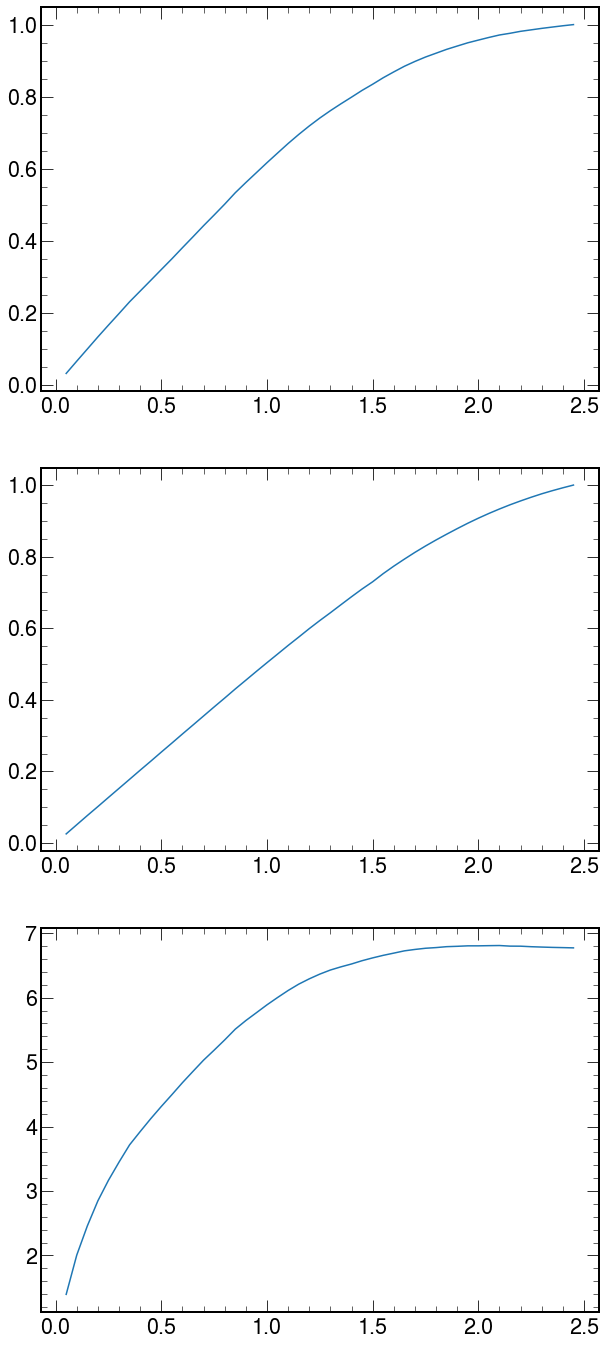

In [44]:
optimization("N_max_eta", np.arange(0.,2.5,0.05), -1)